## ** Movies Data Analysis and Visualization **

## What is the data?
In this notebook, we will see some data regarding 599 random movies in different genres. The data 
includes genres, year of release, budget, crtitics ratings and audience ratings.

## What will we see in this notebook?
We will see how different or similar audience and critics opinions are and we will also see how effectively each 
feature (genre, budget, ...) is contributing to their opinions.

## What tools will be used?

Like most data analysis related documents, in this one I have used the following libraries for data preparation
and manipulation:

    *pandas
    *numpy
And have also used the following libraries for data visualization:
    
    *matplotlib
    *seaborn

## Things to consider:
The data is downloaded from Kaggle.com . 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir("/home/azadeh/dev-temp/data")

In [3]:
Movies = pd.read_csv("Movie-Ratings.csv")

In [4]:
Movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
Movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [7]:
#the year of release is int type, therefore, it is being treated as numbers. But in fact the year does not hold
#any nmeric feature. 

Movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
Movies.columns = ['Film', 'Genre', 'CriticsRatings', 'AudienceRatings',
       'Budget', 'Year']

In [9]:
Movies.Year = Movies.Year.astype("category")
Movies.Genre = Movies.Genre.astype("category")

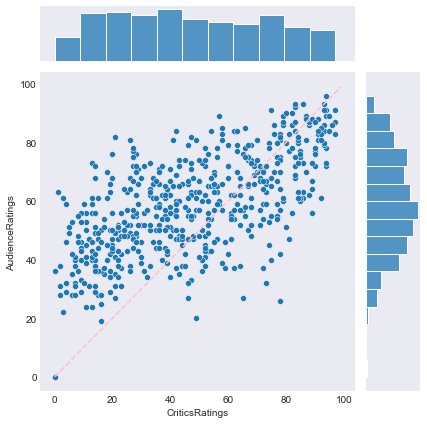

In [25]:

plt.style.use("seaborn-dark")

g =sns.jointplot(data=Movies, x="CriticsRatings", y="AudienceRatings")
g.ax_joint.plot(range(0,100), range(0,100), ls="--", c="pink");

## ANALYSIS
In this plot, we can observe that the closer the dots are to the diagonal, the closer the opinions of critics
and normal people. As we know, non-critic audience tend to give higher ratings because emotion and personal
preferences plays a big role in theirratings. Therefore, in this plot the audience rating is mostly above the 
diagonal.
It is also visible in the histograms on the left and above the plot. As we see, the audience ratings histogram
follows a patter that look more alike a normal distribution because human emotions and reactions, tend to follow
the normal distribution whereas for critcs, it has too many ups and downs.


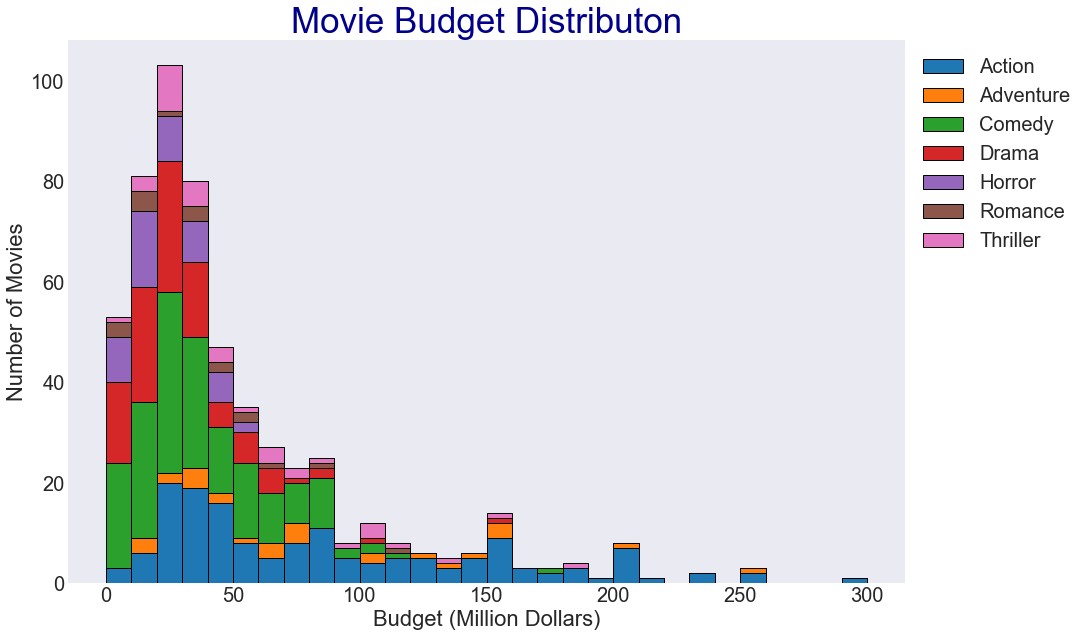

In [11]:
Types = []
Mylabels = []
for gen in Movies.Genre.cat.categories:
    Types.append(Movies[Movies.Genre==gen].Budget)
    Mylabels.append(gen)
plt.rcParams["figure.figsize"]=(15,10)
StackedHist = plt.hist(Types, bins=30, stacked=True, label=Mylabels, rwidth=1, edgecolor="black")

plt.title("Movie Budget Distributon", fontsize=35, color="DarkBlue")
plt.ylabel("Number of Movies", fontsize=22)
plt.xlabel("Budget (Million Dollars)", fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(prop={"size":20}, loc="upper left", bbox_to_anchor=(1,1));


## Analysis
obviously, the majority of movies with the budget of less than 50-55 miilion dollars. We can also see that the 
highest number of movies made in most columns belongs to the genre of Thriller.
This could have 2 reasons. Firstly, it could be the result of picking movies mostly from this genre for our
dataset. Secondly, it might be the result of this genre being appealing to most people regarding their gender,
age and nationality so therefore, many producers tend to produce movies in this genre. Kind of like pop music.

on the other hand, the action genre seem to be the fewest number of movies made in all budgets! This again could 
be fistly, because of the sampling or secondly because of the limited popularity this type of movie has.

Drama and romance also seem to be leading the number of movies in most genres which is again understandable
due to their popularity.

## CREATING A FACETGRID SHOWING THE RELATION BETWEEN AUDIENCE AND CRITICS RATING TO EACH GENRE

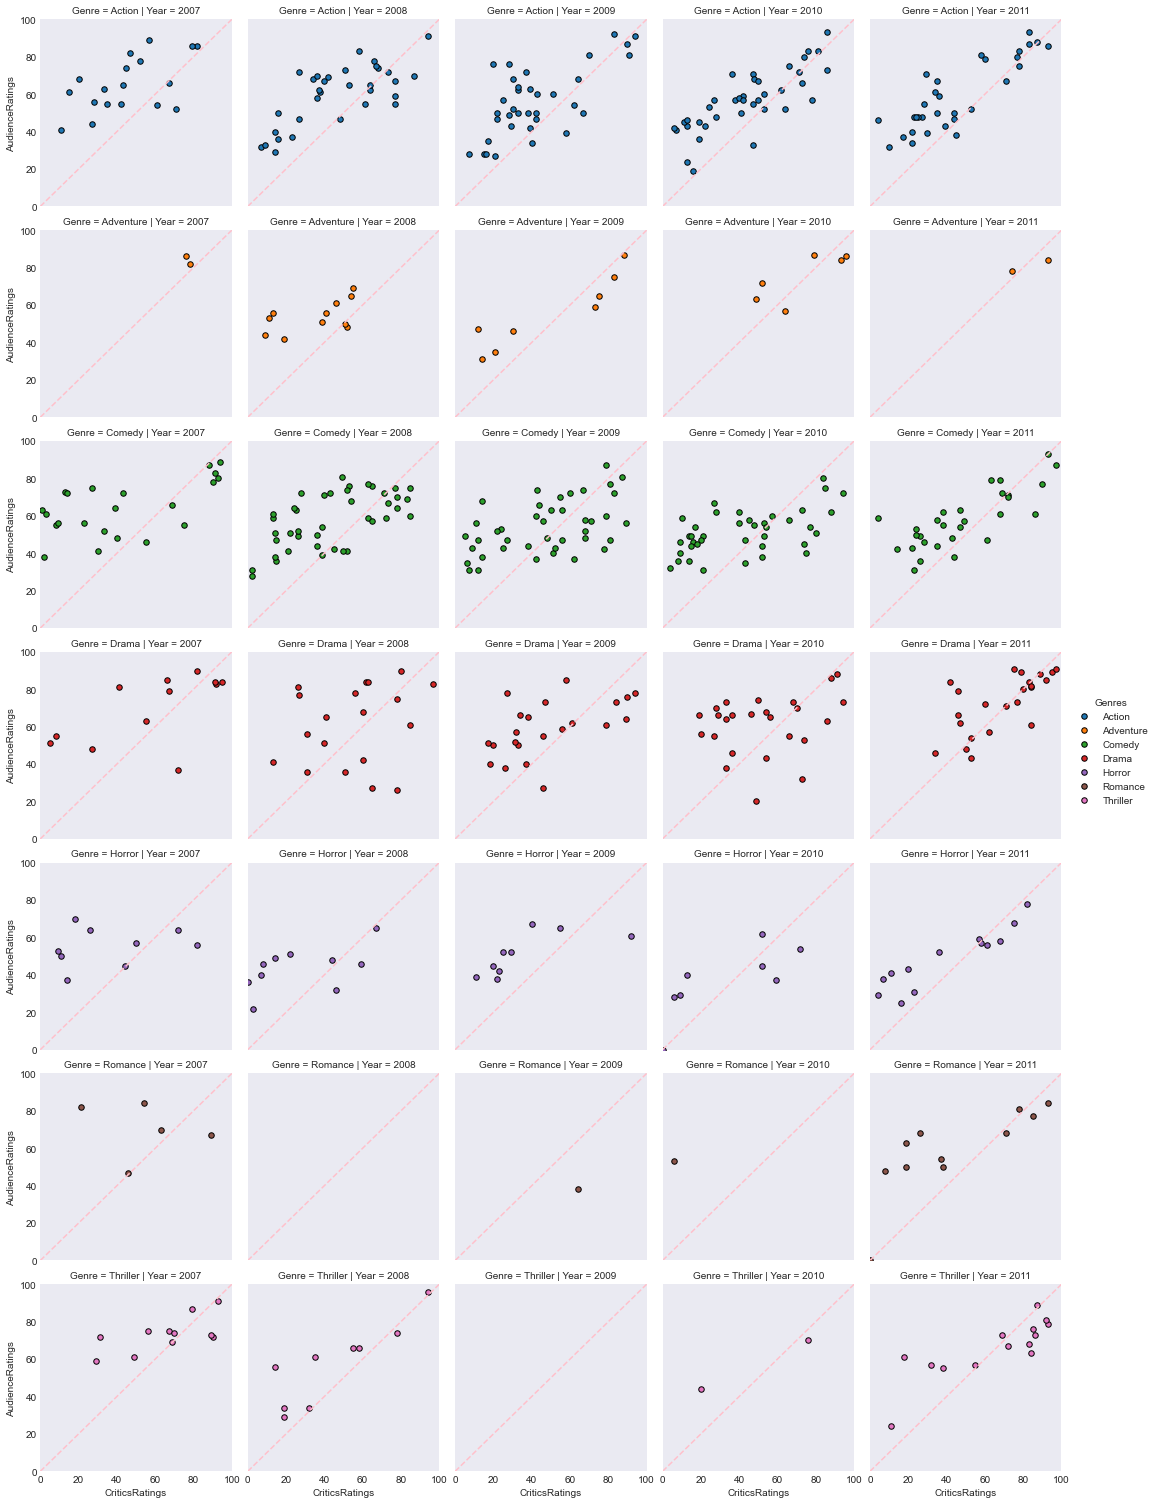

In [12]:
mov = sns.FacetGrid(Movies, row="Genre", col="Year", hue="Genre")

kwargs={"s":30, "edgecolor":"black"}

mov1 = mov.map(plt.scatter, "CriticsRatings", "AudienceRatings", **kwargs)
mov.set(xlim=(0,100), ylim=(0,100))

for ax in mov.axes.flat:
    ax.plot((0,100), (0,100), c="pink", ls="--")
    
mov.add_legend(title="Genres");

## Analysis
Using these plots we can see that for MOST genres, audience ratings seem to be higher than critics ratings. This 
could be the result of the fact that critics mostly rate based on criteria rather than ther personal preferences.
The year feature does not seem to play a crutial role in the relations.

we can also see that the more samples we get, the more dispersion we can expect.

## A DASHBOARD TO SHOW THE IMPACT OF THE BUDGET SPENT ON MOVIES ON CRITICS AND AUDIENCE RATINGS

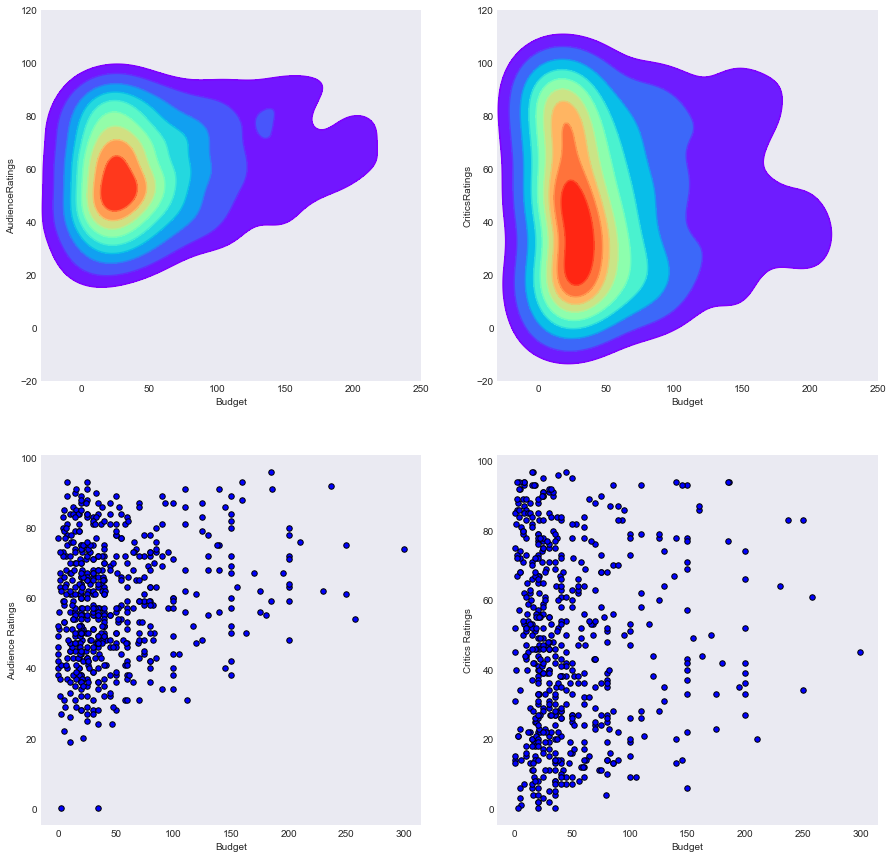

In [13]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.set_style("dark")

axes1 = sns.kdeplot(data=Movies, x="Budget", y="AudienceRatings", ax=ax[0,0], cmap="rainbow", shade=True)
axes2 = sns.kdeplot(data=Movies, x="Budget", y="AudienceRatings", ax=ax[0,0], cmap="rainbow")
axes1.set(xlim=(-30, 250))
axes1.set(ylim=(-20,120))

axes3 = sns.kdeplot(data=Movies, x="Budget", y="CriticsRatings", ax=ax[0,1], cmap="rainbow", shade=True)
axes4 = sns.kdeplot(data=Movies, x="Budget", y="CriticsRatings", ax=ax[0,1], cmap="rainbow")
axes3.set(xlim=(-30, 250))
axes3.set(ylim=(-20,120))

kwargs={"s":30, "edgecolor":"black", "c":"blue"}

ax5 = ax[1,0].scatter(x=Movies.Budget, y=Movies.AudienceRatings, **kwargs)
ax6 = ax[1,1].scatter(x=Movies.Budget, y=Movies.CriticsRatings, **kwargs)

ax[1,0].set(xlabel="Budget")
ax[1,0].set(ylabel="Audience Ratings")
ax[1,1].set(xlabel="Budget")
ax[1,1].set(ylabel="Critics Ratings");

## ANALYSIS
In this visualization, the same data has been visualized using both scatter and KDE plots. As they both imply,
for movies with the budget of less than 100 million dollars, we have the highest density of ratings. This is
clearly because most of the samples we have, and in general most of the movies, are produced with this amount of
budget.
As for audience, the higher the budget, the higher the average rating seems to be. But for critics, the budget does
not seem to be playing a crutial role since the average rating does not look that different in high budget movies.

This in my opinion, could be the result of non-critic people getting impressed by special effect more easily than 
critics.